In [68]:
#Problem 2a/b
f = "desktop/bi1/RNAP_matrix.txt"

def findScores(seq):
    fo = open(f, "r")
    for l in range(0,7):
        strin = fo.readline();
    
    matrix = [[0 for x in range(4)] for y in range(41)]
    for i in range(0, 41):
        stri = fo.readline();
        strArr = ['','','','']
        energies = [0, 0, 0, 0]
        k = 0
        for j in range(0, len(stri)):
            if (stri[j] == " ") or (j == len(stri) - 1):
                strNum = float(strArr[k])
                energies[k] = strNum
                k += 1
            else:
                strArr[k] += stri[j]
    
        matrix[i][0] = energies[0]
        matrix[i][1] = energies[1]
        matrix[i][2] = energies[2]
        matrix[i][3] = energies[3]
    
    totalScore = 0
    for m in range(0, 41):
        if(seq[m] == 'A'):
            totalScore += matrix[m][0]
        elif(seq[m] == 'C'):
            totalScore += matrix[m][1]
        elif(seq[m] == 'G'):
            totalScore += matrix[m][2]
        elif(seq[m] == 'T'):
            totalScore += matrix[m][3]
    return totalScore

print('p1 binding energy:')
print(findScores('TCGAGTTTACACTTTATGCTTCCGGCTCGTATAATGTGTGG'))

p1 binding energy:
-6.992057747845057


In [69]:
print('p2 binding energy:')
print(findScores('TCGAGTTTACACTTTATGCTTCCGGCTCGGATAATGTGTGG'))

p2 binding energy:
-5.584672027506074


In [70]:
print('Extra credit 1 binding energy:')
print(findScores('CAGGCTCTACGCTTTATTCTTGCGGCTCGTATGGTGTGTGG'))

Extra credit 1 binding energy:
-3.9363706563196317


In [71]:
print('Extra credit 2 binding energy:')
print(findScores('GAGGCTGGACACTTTAATCTTCCCTATCGTATGTTGTGTGC'))

Extra credit 2 binding energy:
-6.294688950104942


In [131]:
print('Extra credit 3 binding energy:')
print(findScores('CGAGCATGCCACCTTAAGCCTCTGGCTCGTATGACGTGTGG'))

Extra credit 3 binding energy:
-3.2291480237687833


In [132]:
#So the p1 binding energy is -6.992, the p2 binding energy is -5.585, the extra credit 1 binding energy is -3.936, 
#the extra credit 2 binding energy is -6.295, and the extra credit 3 binding energy is -3.229

In [133]:
#Problem 3c
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline

e = 2.718281828459045
P = 1000
dE_p = -5
dE_r = -15
N_NS = 4600000

def p_empty(R):
    return 1.0/(((P / N_NS) * e ** (-dE_p)) + ((R / N_NS) * e ** (-dE_r)) + 1)

def p_promoter(R):
    return ((P / N_NS) * e ** (-dE_p))/(((P / N_NS) * e ** (-dE_p)) + ((R / N_NS) * e ** (-dE_r)) + 1)

def p_repressor(R):
    return ((R / N_NS) * e ** (-dE_r))/(((P / N_NS) * e ** (-dE_p)) + ((R / N_NS) * e ** (-dE_r)) + 1)


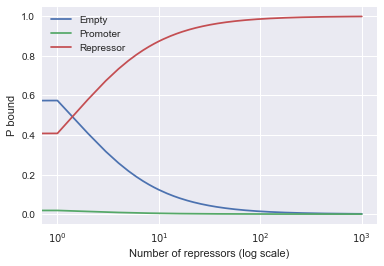

In [134]:
steps = np.arange(0, 1000, 1)
empty_vals = np.zeros(1000)
promoter_vals = np.zeros(1000)
repressor_vals = np.zeros(1000)
for i in range(1, 1000):
    empty_vals[i] = p_empty(i)
    promoter_vals[i] = p_promoter(i)
    repressor_vals[i] = p_repressor(i)

plt.xscale('log')
plt.plot(steps, empty_vals, '-', label='Empty')
plt.plot(steps, promoter_vals, '-', label='Promoter')
plt.plot(steps, repressor_vals, '-', label='Repressor')
plt.xlabel('Number of repressors (log scale)')
plt.ylabel('P bound')
plt.legend()

In [135]:
#Problem 3f

def F(R, dEr):
    return 1.0/(1 + (R / N_NS) * e ** (- dEr))

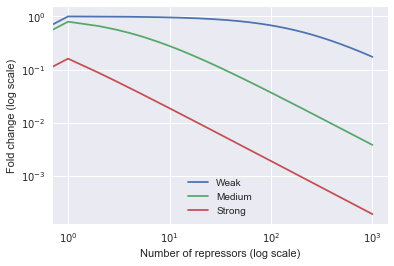

In [136]:
steps = np.arange(0, 1000, 1)
weak = np.zeros(1000)
medium = np.zeros(1000)
strong = np.zeros(1000)
for i in range(1, 1000):
    weak[i] = F(i, -10)
    medium[i] = F(i, -14)
    strong[i] = F(i, -17)
plt.xscale('log')
plt.yscale('log')
plt.plot(steps, weak, '-', label='Weak')
plt.plot(steps, medium, '-', label='Medium')
plt.plot(steps, strong, '-', label='Strong')
plt.xlabel('Number of repressors (log scale)')
plt.ylabel('Fold change (log scale)')
plt.legend()